1) Data Cleaning

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
train = pd.read_csv("train.csv")
train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [4]:
train['Loan_Status'].replace(['Y','N'], [1,0], inplace = True)
Y_train = train['Loan_Status']
Y_train.head()


0    1
1    0
2    1
3    1
4    1
Name: Loan_Status, dtype: int64

In [5]:
print(train['Gender'].unique())
print(train['Dependents'].unique())
print(train['Married'].unique())
print(train['Self_Employed'].unique())
print(train['Education'].unique())
print(train['Property_Area'].unique())
print(train['Credit_History'].unique())
print(train['Loan_Amount_Term'].unique())
print(train['LoanAmount'].unique())
print(train['ApplicantIncome'].unique())
print(train['CoapplicantIncome'].unique())

['Male' 'Female' nan]
['0' '1' '2' '3+' nan]
['No' 'Yes' nan]
['No' 'Yes' nan]
['Graduate' 'Not Graduate']
['Urban' 'Rural' 'Semiurban']
[ 1.  0. nan]
[360. 120. 240.  nan 180.  60. 300. 480.  36.  84.  12.]
[ nan 128.  66. 120. 141. 267.  95. 158. 168. 349.  70. 109. 200. 114.
  17. 125. 100.  76. 133. 115. 104. 315. 116. 112. 151. 191. 122. 110.
  35. 201.  74. 106. 320. 144. 184.  80.  47.  75. 134.  96.  88.  44.
 286.  97. 135. 180.  99. 165. 258. 126. 312. 136. 172.  81. 187. 113.
 176. 130. 111. 167. 265.  50. 210. 175. 131. 188.  25. 137. 160. 225.
 216.  94. 139. 152. 118. 185. 154.  85. 259. 194.  93. 370. 182. 650.
 102. 290.  84. 242. 129.  30. 244. 600. 255.  98. 275. 121.  63. 700.
  87. 101. 495.  67.  73. 260. 108.  58.  48. 164. 170.  83.  90. 166.
 124.  55.  59. 127. 214. 240.  72.  60. 138.  42. 280. 140. 155. 123.
 279. 192. 304. 330. 150. 207. 436.  78.  54.  89. 143. 105. 132. 480.
  56. 159. 300. 376. 117.  71. 490. 173.  46. 228. 308. 236. 570. 380.
 296. 156. 

In [6]:
train.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status
count,614.000000,614.000000,592.000000,600.00000,564.000000,614.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199,0.687296
std,6109.041673,2926.248369,85.587325,65.12041,0.364878,0.463973
min,150.000000,0.000000,9.000000,12.00000,0.000000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000,0.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000,1.000000


In [7]:
train['Gender'].replace(['Male', 'Female'], [0,1], inplace=True)
train['Married'].replace(['Yes','No'], [1,0], inplace = True)
train['Dependents'].replace(['0','1','2','3+'], [0,1,2,3], inplace = True)
train['Self_Employed'].replace(['Yes','No'], [1,0], inplace = True)
train['Education'].replace(['Graduate','Not Graduate'], [1,0], inplace = True)
train['Property_Area'].replace(['Urban','Rural','Semiurban'], [0,1,2], inplace = True)

In [8]:
train.drop(['Loan_ID','Loan_Status'], axis = 1, inplace =True)
train.describe()
train.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,0.0,0.0,0.0,1,0.0,5849,0.0,NaN,360.0,1.0,0
1,0.0,1.0,1.0,1,0.0,4583,1508.0,128.0,360.0,1.0,1
2,0.0,1.0,0.0,1,1.0,3000,0.0,66.0,360.0,1.0,0
3,0.0,1.0,0.0,0,0.0,2583,2358.0,120.0,360.0,1.0,0
4,0.0,0.0,0.0,1,0.0,6000,0.0,141.0,360.0,1.0,0


In [9]:
train.fillna({'Dependents': 1, 'Married' : 1, 'Gender' : 1, 'Self_Employed' : 1, 'Property_Area' : 2,'Credit_History' : 1}, inplace = True)

In [10]:
print(train['Gender'].unique())
print(train['Dependents'].unique())
print(train['Married'].unique())
print(train['Self_Employed'].unique())
print(train['Education'].unique())
print(train['Property_Area'].unique())
print(train['Credit_History'].unique())
print(train['Loan_Amount_Term'].unique())
print(train['LoanAmount'].unique())
print(train['ApplicantIncome'].unique())
print(train['CoapplicantIncome'].unique())


[0. 1.]
[0. 1. 2. 3.]
[0. 1.]
[0. 1.]
[1 0]
[0 1 2]
[1. 0.]
[360. 120. 240.  nan 180.  60. 300. 480.  36.  84.  12.]
[ nan 128.  66. 120. 141. 267.  95. 158. 168. 349.  70. 109. 200. 114.
  17. 125. 100.  76. 133. 115. 104. 315. 116. 112. 151. 191. 122. 110.
  35. 201.  74. 106. 320. 144. 184.  80.  47.  75. 134.  96.  88.  44.
 286.  97. 135. 180.  99. 165. 258. 126. 312. 136. 172.  81. 187. 113.
 176. 130. 111. 167. 265.  50. 210. 175. 131. 188.  25. 137. 160. 225.
 216.  94. 139. 152. 118. 185. 154.  85. 259. 194.  93. 370. 182. 650.
 102. 290.  84. 242. 129.  30. 244. 600. 255.  98. 275. 121.  63. 700.
  87. 101. 495.  67.  73. 260. 108.  58.  48. 164. 170.  83.  90. 166.
 124.  55.  59. 127. 214. 240.  72.  60. 138.  42. 280. 140. 155. 123.
 279. 192. 304. 330. 150. 207. 436.  78.  54.  89. 143. 105. 132. 480.
  56. 159. 300. 376. 117.  71. 490. 173.  46. 228. 308. 236. 570. 380.
 296. 156. 103.  45.  65.  53. 360.  62. 218. 178. 239. 405. 148. 190.
 149. 153. 162. 230.  86. 234. 

In [11]:
train.fillna({'Loan_Amount_Term': train['Loan_Amount_Term'].mean(),'LoanAmount': train['LoanAmount'].mean()}, inplace = True)

In [42]:
train['Loan_Amount_Term'] =(train['Loan_Amount_Term'] - train['Loan_Amount_Term'].mean())/train['Loan_Amount_Term'].std()
train['ApplicantIncome'] =(train['ApplicantIncome'] - train['ApplicantIncome'].mean())/train['ApplicantIncome'].std()
train['LoanAmount'] =(train['LoanAmount'] - train['LoanAmount'].mean())/train['LoanAmount'].std()
train['CoapplicantIncome'] =(train['CoapplicantIncome'] - train['CoapplicantIncome'].mean())/train['CoapplicantIncome'].std()
train.isna().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
dtype: int64

In [13]:
train.to_csv('X_train.csv', header = True)
Y_train.to_csv('Y_train.csv', header = True)

2) EDA

In [14]:
X_td = pd.read_csv('X_train.csv')
Y_td = pd.read_csv('Y_train.csv')
Y_td.head()

,Unnamed: 0,Loan_Status
0,0,1
1,1,0
2,2,1
3,3,1
4,4,1


In [15]:
X_td.drop(X_td.columns[X_td.columns.str.contains('unnamed',case = False)], axis = 1, inplace =True)
X_td.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,0.0,0.0,0.0,1,0.0,0.072931,-0.554036,0.000000,0.279623,1.0,0
1,0.0,1.0,1.0,1,0.0,-0.134302,-0.038700,-0.219095,0.279623,1.0,1
2,0.0,1.0,0.0,1,1.0,-0.393427,-0.554036,-0.956861,0.279623,1.0,0
3,0.0,1.0,0.0,0,0.0,-0.461686,0.251774,-0.314290,0.279623,1.0,0
4,0.0,0.0,0.0,1,0.0,0.097649,-0.554036,-0.064402,0.279623,1.0,0


In [16]:
Y_td.drop(Y_td.columns[Y_td.columns.str.contains('unnamed',case = False)], axis = 1, inplace =True)
Y_td.head()

,Loan_Status
0,1
1,0
2,1
3,1
4,1


In [17]:
df = X_td
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,0.0,0.0,0.0,1,0.0,0.072931,-0.554036,0.000000,0.279623,1.0,0
1,0.0,1.0,1.0,1,0.0,-0.134302,-0.038700,-0.219095,0.279623,1.0,1
2,0.0,1.0,0.0,1,1.0,-0.393427,-0.554036,-0.956861,0.279623,1.0,0
3,0.0,1.0,0.0,0,0.0,-0.461686,0.251774,-0.314290,0.279623,1.0,0
4,0.0,0.0,0.0,1,0.0,0.097649,-0.554036,-0.064402,0.279623,1.0,0


In [19]:
df_rel = df.copy()
df_rel['Loan_Status'] = Y_td['Loan_Status']
df_rel.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,0.0,0.0,0.0,1,0.0,0.072931,-0.554036,0.000000,0.279623,1.0,0,1
1,0.0,1.0,1.0,1,0.0,-0.134302,-0.038700,-0.219095,0.279623,1.0,1,0
2,0.0,1.0,0.0,1,1.0,-0.393427,-0.554036,-0.956861,0.279623,1.0,0,1
3,0.0,1.0,0.0,0,0.0,-0.461686,0.251774,-0.314290,0.279623,1.0,0,1
4,0.0,0.0,0.0,1,0.0,0.097649,-0.554036,-0.064402,0.279623,1.0,0,1


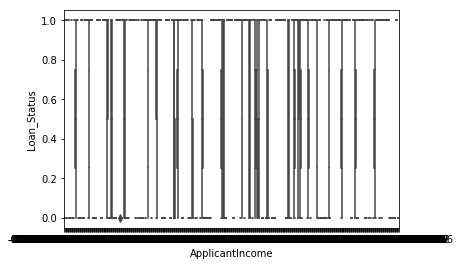

In [20]:
sns.boxplot(x="ApplicantIncome", y="Loan_Status", data=df_rel)

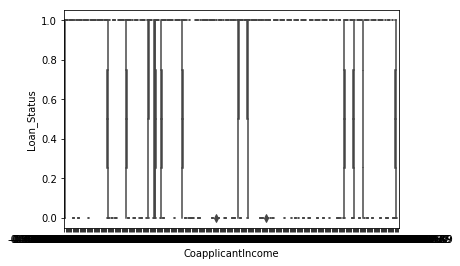

In [21]:
sns.boxplot(x="CoapplicantIncome", y="Loan_Status", data=df_rel)

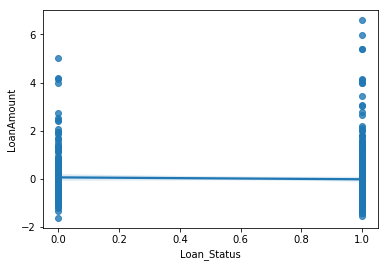

In [22]:
sns.regplot(x="Loan_Status", y="LoanAmount", data=df_rel)

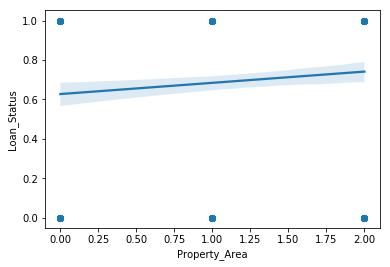

In [23]:
sns.regplot(x="Property_Area", y="Loan_Status", data=df_rel)

3) Creating A Model


a) K-Nearest Neighbours

In [24]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 3)


In [27]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X_td, Y_td.values.ravel(), test_size = 0.2, random_state =1)
knn.fit(x_train,y_train )

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

In [28]:
from sklearn import metrics
Y_pred = knn.predict(x_test)
metrics.accuracy_score(y_test,Y_pred)

0.6666666666666666

In [30]:
X_test = pd.read_csv('test.csv')
X_test['Gender'].replace(['Male', 'Female'], [0,1], inplace=True)
X_test['Married'].replace(['Yes','No'], [1,0], inplace = True)
X_test['Dependents'].replace(['0','1','2','3+'], [0,1,2,3], inplace = True)
X_test['Self_Employed'].replace(['Yes','No'], [1,0], inplace = True)
X_test['Education'].replace(['Graduate','Not Graduate'], [1,0], inplace = True)
X_test['Property_Area'].replace(['Urban','Rural','Semiurban'], [0,1,2], inplace = True)
X_test.drop(['Loan_ID'], axis = 1, inplace =True)
X_test.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,0.0,1,0.0,1,0.0,5720,0,110.0,360.0,1.0,0
1,0.0,1,1.0,1,0.0,3076,1500,126.0,360.0,1.0,0
2,0.0,1,2.0,1,0.0,5000,1800,208.0,360.0,1.0,0
3,0.0,1,2.0,1,0.0,2340,2546,100.0,360.0,NaN,0
4,0.0,0,0.0,0,0.0,3276,0,78.0,360.0,1.0,0


In [43]:
X_test.fillna({'Dependents': 1, 'Married' : 1, 'Gender' : 1, 'Self_Employed' : 1, 'Property_Area' : 2,'Credit_History' : 1}, inplace = True)
X_test.fillna({'Loan_Amount_Term': X_test['Loan_Amount_Term'].mean(),'LoanAmount': X_test['LoanAmount'].mean()}, inplace = True)
X_test['Loan_Amount_Term'] =(X_test['Loan_Amount_Term'] - X_test['Loan_Amount_Term'].mean())/X_test['Loan_Amount_Term'].std()
X_test['ApplicantIncome'] =(X_test['ApplicantIncome'] - X_test['ApplicantIncome'].mean())/X_test['ApplicantIncome'].std()
X_test['LoanAmount'] =(X_test['LoanAmount'] - X_test['LoanAmount'].mean())/X_test['LoanAmount'].std()
X_test['CoapplicantIncome'] =(X_test['CoapplicantIncome'] - X_test['CoapplicantIncome'].mean())/X_test['CoapplicantIncome'].std()

In [44]:
X_test.isna().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
dtype: int64

In [46]:
knn_pred = knn.predict(X_test)
knn_pred1 = pd.DataFrame(knn_pred)
knn_pred1.head()

,0
0,1
1,1
2,1
3,1
4,0


In [50]:
knn_pred1.to_csv('KNeighbours_pred1.csv')

b) Logistic Regression

In [52]:
from sklearn.linear_model import LogisticRegression


In [53]:
logisticRegr = LogisticRegression()

In [54]:
logisticRegr.fit(x_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [58]:
L_pred = logisticRegr.predict(x_test)
metrics.accuracy_score(y_test,L_pred)

0.8048780487804879

In [59]:
Log_pred = logisticRegr.predict(X_test)
L_pred1 = pd.DataFrame(Log_pred)
L_pred1.to_csv('Logistic_pred.csv')